In [1]:
import pandas as pd
import os, sys
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statistics as st
sys.path.insert(0,'../scripts/')


User Overview analysis

In [2]:
telecom_df = pd.read_csv('../data/telecom_clean_data.csv')
telecom_df.drop("Unnamed: 0",axis=1,inplace=True)
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))

In [3]:
telecom_df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352",4/4/2019 12:01,770,4/25/2019 14:35,662,"1,823,652","208,201,448,079,117","33,664,962,239","35,521,209,507,511",9.16456699548519E+015,...,"15,854,611","2,501,332","8,198,936","9,656,251","278,082,303","14,344,150","171,744,450","8,814,393","36,749,741","308,879,636"
1,"13,114,483,482,878,900,224",4/9/2019 13:04,235,4/25/2019 8:15,606,"1,365,104","208,201,909,211,140","33,681,854,413","35,794,009,006,359",L77566A,...,"20,247,395","19,111,729","18,338,413","17,227,132","608,750,074","1,170,709","526,904,238","15,055,145","53,800,391","653,384,965"
2,"13,114,483,484,080,500,736",4/9/2019 17:42,1,4/25/2019 11:58,652,"1,361,762","208,200,314,458,056","33,760,627,129","35,281,510,359,387",D42335A,...,"19,725,661","14,699,576","17,587,794","6,163,408","229,584,621","395,630","410,692,588","4,215,763","27,883,638","279,807,335"
3,"13,114,483,485,442,799,616",4/10/2019 0:31,486,4/25/2019 7:36,171,"1,321,509","208,201,402,342,131","33,750,343,200","35,356,610,164,913",T21824A,...,"21,388,122","15,146,643","13,994,646","1,097,942","799,538,153","10,849,722","749,039,933","12,797,283","43,324,218","846,028,530"
4,"13,114,483,499,480,700,928",4/12/2019 20:10,565,4/25/2019 10:40,954,"1,089,009","208,201,401,415,120","33,699,795,932","35,407,009,745,539",D88865A,...,"15,259,380","18,962,873","17,124,581","415,218","527,707,248","3,529,801","550,709,500","13,910,322","38,542,814","569,138,589"


In [4]:
telecom_df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352",4/4/2019 12:01,770,4/25/2019 14:35,662,"1,823,652","208,201,448,079,117","33,664,962,239","35,521,209,507,511",9.16456699548519E+015,...,"15,854,611","2,501,332","8,198,936","9,656,251","278,082,303","14,344,150","171,744,450","8,814,393","36,749,741","308,879,636"
1,"13,114,483,482,878,900,224",4/9/2019 13:04,235,4/25/2019 8:15,606,"1,365,104","208,201,909,211,140","33,681,854,413","35,794,009,006,359",L77566A,...,"20,247,395","19,111,729","18,338,413","17,227,132","608,750,074","1,170,709","526,904,238","15,055,145","53,800,391","653,384,965"
2,"13,114,483,484,080,500,736",4/9/2019 17:42,1,4/25/2019 11:58,652,"1,361,762","208,200,314,458,056","33,760,627,129","35,281,510,359,387",D42335A,...,"19,725,661","14,699,576","17,587,794","6,163,408","229,584,621","395,630","410,692,588","4,215,763","27,883,638","279,807,335"
3,"13,114,483,485,442,799,616",4/10/2019 0:31,486,4/25/2019 7:36,171,"1,321,509","208,201,402,342,131","33,750,343,200","35,356,610,164,913",T21824A,...,"21,388,122","15,146,643","13,994,646","1,097,942","799,538,153","10,849,722","749,039,933","12,797,283","43,324,218","846,028,530"
4,"13,114,483,499,480,700,928",4/12/2019 20:10,565,4/25/2019 10:40,954,"1,089,009","208,201,401,415,120","33,699,795,932","35,407,009,745,539",D88865A,...,"15,259,380","18,962,873","17,124,581","415,218","527,707,248","3,529,801","550,709,500","13,910,322","38,542,814","569,138,589"



Top 10 handsets used by the customers

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: count, dtype: int64

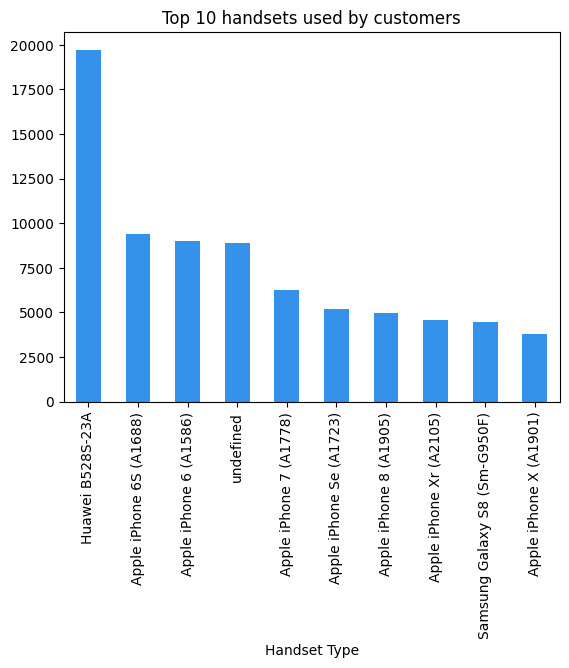

In [5]:
handset_type= telecom_df['Handset Type'].value_counts()[0:10]
handset_type.plot.bar(x='Handset Type', title="Top 10 handsets used by customers", stacked=True, color='#3492eb')
handset_type

Top 3 handset manufacturers

Handset Manufacturer
Apple      59339
Samsung    40429
Huawei     34296
Name: count, dtype: int64

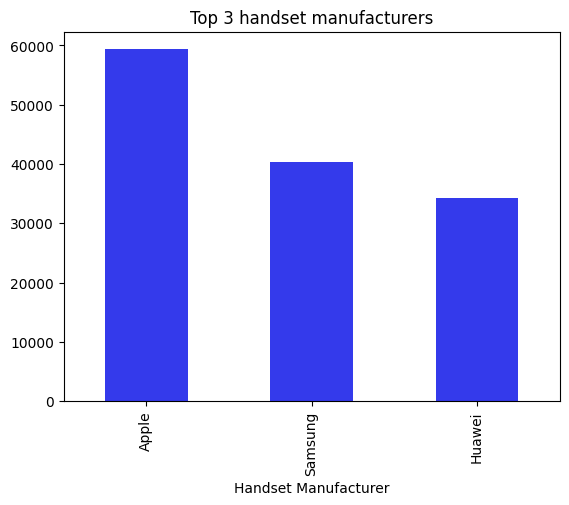

In [6]:
Handset_manufacturers = telecom_df['Handset Manufacturer'].value_counts()[0:3]
Handset_manufacturers.plot.bar(x='Handset Manufacturer', title="Top 3 handset manufacturers", stacked=True, color='#343aeb')
Handset_manufacturers

Top 5 handsets per top 3 handset manufacturer

count
Handset Manufacturer Handset Type                  
Apple                Apple iPhone 6S (A1688)   9395
                     Apple iPhone 6 (A1586)    8993
                     Apple iPhone 7 (A1778)    6279
                     Apple iPhone Se (A1723)   5165
                     Apple iPhone 8 (A1905)    4977

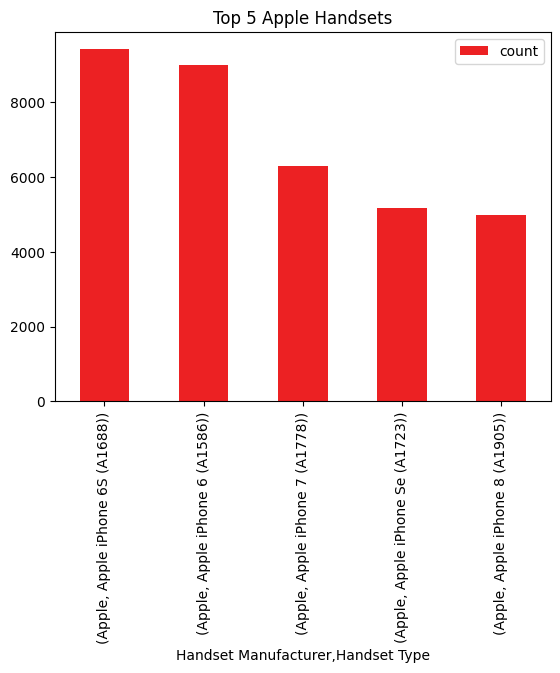

In [7]:
top_apple = telecom_df.loc[telecom_df['Handset Manufacturer'] == 'Apple']
top_apple = top_apple.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_apple.columns = ['count']
top_apple=top_apple.nlargest(5, 'count')
top_apple.plot.bar(y='count', title="Top 5 Apple Handsets", stacked=True, color='#ec2123')
top_apple

count
Handset Manufacturer Handset Type                       
Samsung              Samsung Galaxy S8 (Sm-G950F)   4464
                     Samsung Galaxy A5 Sm-A520F     3700
                     Samsung Galaxy J5 (Sm-J530)    3675
                     Samsung Galaxy J3 (Sm-J330)    3456
                     Samsung Galaxy S7 (Sm-G930X)   3171

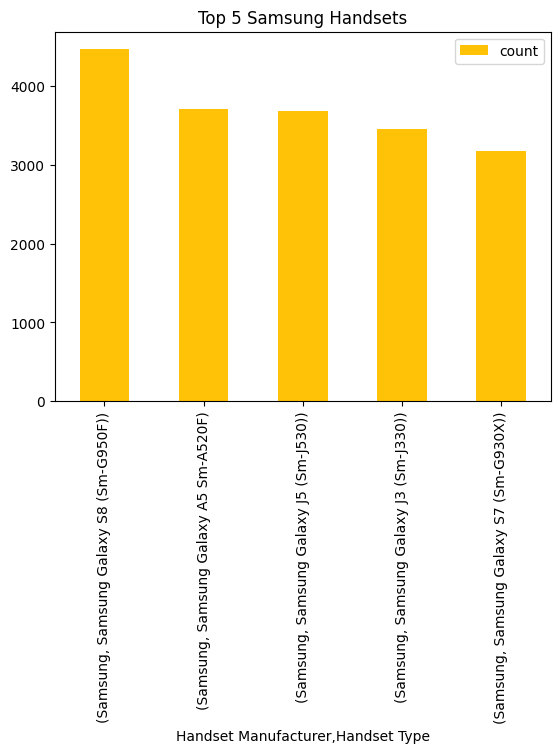

In [8]:
top_samsung = telecom_df.loc[telecom_df['Handset Manufacturer'] == 'Samsung']
top_samsung = top_samsung.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_samsung.columns = ['count']
top_samsung=top_samsung.nlargest(5, 'count')
top_samsung.plot.bar(y='count', title="Top 5 Samsung Handsets", stacked=True, color='#ffc206')
top_samsung

count
Handset Manufacturer Handset Type                         
Huawei               Huawei B528S-23A                19727
                     Huawei E5180                     2074
                     Huawei P20 Lite Huawei Nova 3E   2012
                     Huawei P20                       1475
                     Huawei Y6 2018                    996

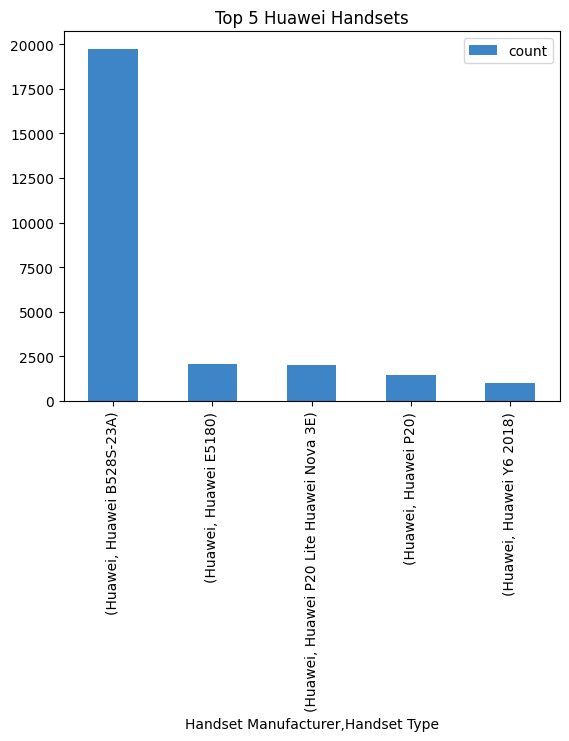

In [9]:
top_huawei = telecom_df.loc[telecom_df['Handset Manufacturer'] == 'Huawei']
top_huawei = top_huawei.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_huawei.columns = ['count']
top_huawei=top_huawei.nlargest(5, 'count')
top_huawei.plot.bar(y='count', title="Top 5 Huawei Handsets", stacked=True, color='#3d85c6')
top_huawei

The analysis's conclusion reveals:

• The Huawei B528S-23A is the most popular phone model among customers. It is produced by Huawei.

• The top three manufacturers of smartphones are: Apple with 59339, Samsung with 40429, and Huawei with 34296.

• Customers do not prefer Apple's handsets over Samsung's, and Samsung manufacturers the same as Apple does.

• It is advised that Huawei Handsets manufacturers expand their manufacturing capacity in order to better serve clients.






Task 2.1

number of xDR sessions


In [10]:
xDR_session_per_user = telecom_df.groupby('MSISDN/Number')['Bearer Id'].sum()
xDR_session_per_user

MSISDN/Number
33,601,001,722        13,114,483,554,762,799,104
33,601,001,754         7,349,883,260,786,089,984
33,601,002,511         7,349,883,263,388,680,192
33,601,007,832        13,042,425,972,781,099,008
33,601,008,617        14,627,708,905,718,919,168
                                 ...            
33,789,996,170        13,042,425,959,639,599,104
33,789,997,247        13,114,483,558,421,200,896
3,197,020,876,596      7,277,825,624,788,950,016
337,000,037,000,919    7,349,883,258,102,979,584
882,397,108,489,451    7,277,825,601,573,409,792
Name: Bearer Id, Length: 106471, dtype: float64

Session duration

In [11]:
session_duration_per_user = telecom_df.groupby('MSISDN/Number')['Dur. (ms)'].sum()
session_duration_per_user

MSISDN/Number
33,601,001,722        116,720
33,601,001,754        181,230
33,601,002,511        134,969
33,601,007,832         49,878
33,601,008,617         37,104
                        ...  
33,789,996,170          8,810
33,789,997,247        140,988
3,197,020,876,596     877,385
337,000,037,000,919   253,030
882,397,108,489,451   869,844
Name: Dur. (ms), Length: 106471, dtype: float64

the total download (DL) and upload (UL) data


In [12]:
total_ul = telecom_df.groupby('MSISDN/Number')['Total UL (Bytes)'].sum()
total_dl = telecom_df.groupby('MSISDN/Number')['Total DL (Bytes)'].sum()
print(f'total upload:\n{total_ul}\n\ntotal download:\n{total_dl}\n\ntotal upload + download: {total_dl+total_ul}')


total upload:
MSISDN/Number
33,601,001,722        36,053,108
33,601,001,754        36,104,459
33,601,002,511        39,306,820
33,601,007,832        20,327,526
33,601,008,617        94,280,527
                         ...    
33,789,996,170        26,716,429
33,789,997,247        35,732,243
3,197,020,876,596     37,295,915
337,000,037,000,919   56,652,839
882,397,108,489,451   60,456,049
Name: Total UL (Bytes), Length: 106471, dtype: float64

total download:
MSISDN/Number
33,601,001,722          842,637,466
33,601,001,754          120,755,184
33,601,002,511          556,659,663
33,601,007,832          401,993,172
33,601,008,617        1,363,130,417
                           ...     
33,789,996,170          687,925,212
33,789,997,247          444,575,092
3,197,020,876,596       194,828,056
337,000,037,000,919     539,634,985
882,397,108,489,451      78,697,597
Name: Total DL (Bytes), Length: 106471, dtype: float64

total upload + download: MSISDN/Number
33,601,001,722          878,690,

the total data volume (in Bytes) during this session for each application


In [13]:
total_google = telecom_df['Google DL (Bytes)'] + telecom_df['Google UL (Bytes)']
total_email = telecom_df['Email DL (Bytes)'] + telecom_df['Email UL (Bytes)']
total_gaming = telecom_df['Gaming DL (Bytes)'] + telecom_df['Gaming UL (Bytes)']

total_youtube = telecom_df['Youtube DL (Bytes)'] + telecom_df['Youtube UL (Bytes)']
total_netflix = telecom_df['Netflix DL (Bytes)'] + telecom_df['Netflix UL (Bytes)']
total_social = telecom_df['Social Media DL (Bytes)'] + telecom_df['Social Media UL (Bytes)']
total_other = telecom_df['Other DL (Bytes)'] + telecom_df['Other UL (Bytes)']

# add the total data volumes on the main data set
telecom_df['total_google'] = total_google
telecom_df['total_email'] = total_email
telecom_df['total_gaming'] = total_gaming

telecom_df['total_youtube'] = total_youtube
telecom_df['total_netflix'] = total_netflix
telecom_df['total_social'] = total_social
telecom_df['total_other'] = total_other

# aggregate total data volume per application
# google
total_data_volume_per_user_google = telecom_df.groupby('MSISDN/Number')['total_google'].sum()
print(f'{total_data_volume_per_user_google}\n')

# email
total_data_volume_per_user_email = telecom_df.groupby('MSISDN/Number')['total_email'].sum()
print(f'{total_data_volume_per_user_email}\n')

# gaming
total_data_volume_per_user_gaming = telecom_df.groupby('MSISDN/Number')['total_gaming'].sum()
print(f'{total_data_volume_per_user_gaming}\n')

# youtube
total_data_volume_per_user_youtube = telecom_df.groupby('MSISDN/Number')['total_youtube'].sum()
print(f'{total_data_volume_per_user_youtube}\n')

# netflix
total_data_volume_per_user_netflix = telecom_df.groupby('MSISDN/Number')['total_netflix'].sum()
print(f'{total_data_volume_per_user_netflix}\n') 

# social
total_data_volume_per_user_social = telecom_df.groupby('MSISDN/Number')['total_social'].sum()
print(f'{total_data_volume_per_user_social}\n')

# other
total_data_volume_per_user_other = telecom_df.groupby('MSISDN/Number')['total_other'].sum()
print(f'{total_data_volume_per_user_other}\n')

MSISDN/Number
33,601,001,722         4,389,005
33,601,001,754         5,334,863
33,601,002,511         3,443,126
33,601,007,832         9,678,493
33,601,008,617        18,499,616
                         ...    
33,789,996,170         7,531,269
33,789,997,247         5,429,705
3,197,020,876,596     10,438,660
337,000,037,000,919    9,830,617
882,397,108,489,451    9,218,647
Name: total_google, Length: 106471, dtype: float64

MSISDN/Number
33,601,001,722        1,331,362
33,601,001,754        3,307,781
33,601,002,511        3,205,380
33,601,007,832        2,284,670
33,601,008,617        3,305,469
                         ...   
33,789,996,170        1,006,915
33,789,997,247        2,514,097
3,197,020,876,596     1,520,771
337,000,037,000,919   3,318,582
882,397,108,489,451   3,330,974
Name: total_email, Length: 106471, dtype: float64

MSISDN/Number
33,601,001,722          812,458,661
33,601,001,754          119,750,078
33,601,002,511          538,827,713
33,601,007,832          391,126,

MSISDN/Number
33,601,001,722        21,624,548
33,601,001,754        12,432,223
33,601,002,511        21,333,570
33,601,007,832         6,977,321
33,601,008,617        41,533,002
                         ...    
33,789,996,170        26,647,843
33,789,997,247        19,851,572
3,197,020,876,596     11,959,905
337,000,037,000,919   36,734,940
882,397,108,489,451   40,940,710
Name: total_youtube, Length: 106471, dtype: float64

MSISDN/Number
33,601,001,722        27,180,981
33,601,001,754        11,221,763
33,601,002,511        19,353,900
33,601,007,832         1,942,092
33,601,008,617        49,201,724
                         ...    
33,789,996,170        14,902,538
33,789,997,247         8,531,060
3,197,020,876,596     26,592,300
337,000,037,000,919   30,905,042
882,397,108,489,451   28,846,230
Name: total_netflix, Length: 106471, dtype: float64

MSISDN/Number
33,601,001,722        2,232,135
33,601,001,754        2,660,565
33,601,002,511        3,195,623
33,601,007,832          280,29

Task 2.2


Analyze the basic metrics (mean, median, etc) in the Dataset

In [14]:
relevant_features = ['Dur. (ms)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_google', 'total_email', 'total_gaming', 'total_youtube', 'total_netflix', 'total_social', 'total_other']


print("Mean\n", telecom_df[relevant_features].mean(), '\n')
print("Median\n", telecom_df[relevant_features].median(), '\n')

mode_series = pd.Series(telecom_df[relevant_features].mode().values[0], index=relevant_features)
print("Mode\n", mode_series, '\n')

print("Highest\n", telecom_df[relevant_features].max(), '\n')
print("lowest\n", telecom_df[relevant_features].min(), '\n')


Mean
 Dur. (ms)                       105,084
Activity Duration DL (ms)     1,837,842
Activity Duration UL (ms)     1,414,773
Social Media DL (Bytes)       1,795,144
Social Media UL (Bytes)          32,922
Google DL (Bytes)             5,751,770
Google UL (Bytes)             2,056,293
Email DL (Bytes)              1,791,785
Email UL (Bytes)                467,403
Youtube DL (Bytes)           11,633,868
Youtube UL (Bytes)           11,008,568
Netflix DL (Bytes)           11,627,242
Netflix UL (Bytes)           11,001,902
Gaming DL (Bytes)           422,064,223
Gaming UL (Bytes)             8,289,600
Other DL (Bytes)            421,152,465
Other UL (Bytes)              8,262,685
Total UL (Bytes)             41,119,373
Total DL (Bytes)            454,664,032
total_google                  7,808,063
total_email                   2,259,188
total_gaming                430,353,822
total_youtube                22,642,436
total_netflix                22,629,144
total_social                  1,82

Median
 Dur. (ms)                        86,399
Activity Duration DL (ms)        39,018
Activity Duration UL (ms)        46,481
Social Media DL (Bytes)       1,793,860
Social Media UL (Bytes)          32,917
Google DL (Bytes)             5,767,399
Google UL (Bytes)             2,054,222
Email DL (Bytes)              1,793,642
Email UL (Bytes)                466,419
Youtube DL (Bytes)           11,615,962
Youtube UL (Bytes)           11,012,318
Netflix DL (Bytes)           11,642,380
Netflix UL (Bytes)           10,999,370
Gaming DL (Bytes)           423,466,906
Gaming UL (Bytes)             8,291,650
Other DL (Bytes)            421,861,759
Other UL (Bytes)              8,266,016
Total UL (Bytes)             41,141,960
Total DL (Bytes)            455,940,800
total_google                  7,815,669
total_email                   2,264,186
total_gaming                431,658,476
total_youtube                22,661,314
total_netflix                22,636,325
total_social                  1,


Non-Graphical Univariate Analysis


Computing dispersion parameters for each quantitative variable

In [15]:
sub_relevant_features = ['MSISDN/Number','Dur. (ms)','Total UL (Bytes)', 'Total DL (Bytes)', 'total_google','total_email','total_gaming','total_youtube','total_netflix','total_social', 'total_other']

telecom_df[sub_relevant_features].describe()

,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes),total_google,total_email,total_gaming,total_youtube,total_netflix,total_social,total_other
count,"148,506","148,506","148,506","148,506","148,506","148,506","148,506","148,506","148,506","148,506","148,506"
mean,"41,906,541,782","105,084","41,119,373","454,664,032","7,808,063","2,259,188","430,353,822","22,642,436","22,629,144","1,828,066","429,415,150"
std,"2,450,975,846,357","81,073","11,278,441","244,179,073","3,516,724","1,071,152","244,056,892","9,247,684","9,260,477","1,035,638","243,228,409"
min,"33,601,001,722","7,142","2,866,892","7,114,041","40,330","8,359","306,358","78,903","98,432","1,563","149,045"
25%,"33,651,311,444","58,249","33,218,278","243,126,304","4,944,994","1,359,336","218,736,240","15,993,736","15,980,158","932,183","218,668,175"
50%,"33,663,708,556","86,399","41,141,960","455,940,800","7,815,669","2,264,186","431,658,476","22,661,314","22,636,325","1,825,931","430,043,830"
75%,"33,683,515,177","132,933","49,032,524","665,754,159","10,683,066","3,160,024","641,528,162","29,298,240","29,288,322","2,727,493","639,895,974"
max,"882,397,108,489,451","1,859,336","78,331,311","902,969,616","15,528,782","4,518,036","859,202,784","45,190,078","45,198,153","3,650,861","859,520,934"


insight

• Users upload less content than they download

• A greater number of users submit data than download data

• Gamers spend more money on games than on other channels like social media.


Graphical Univariate Analysis

Univariate analysis

Graphical Univariate

Univariate analysis

number of xDR sessions

In [ ]:
telecom_df[['Dur. (ms).1']].describe()

,Dur. (ms).1
count,1.485060e+05
mean,1.050846e+08
std,8.107273e+07
min,7.142988e+06
25%,5.824964e+07
50%,8.639999e+07
75%,1.329333e+08
max,1.859336e+09


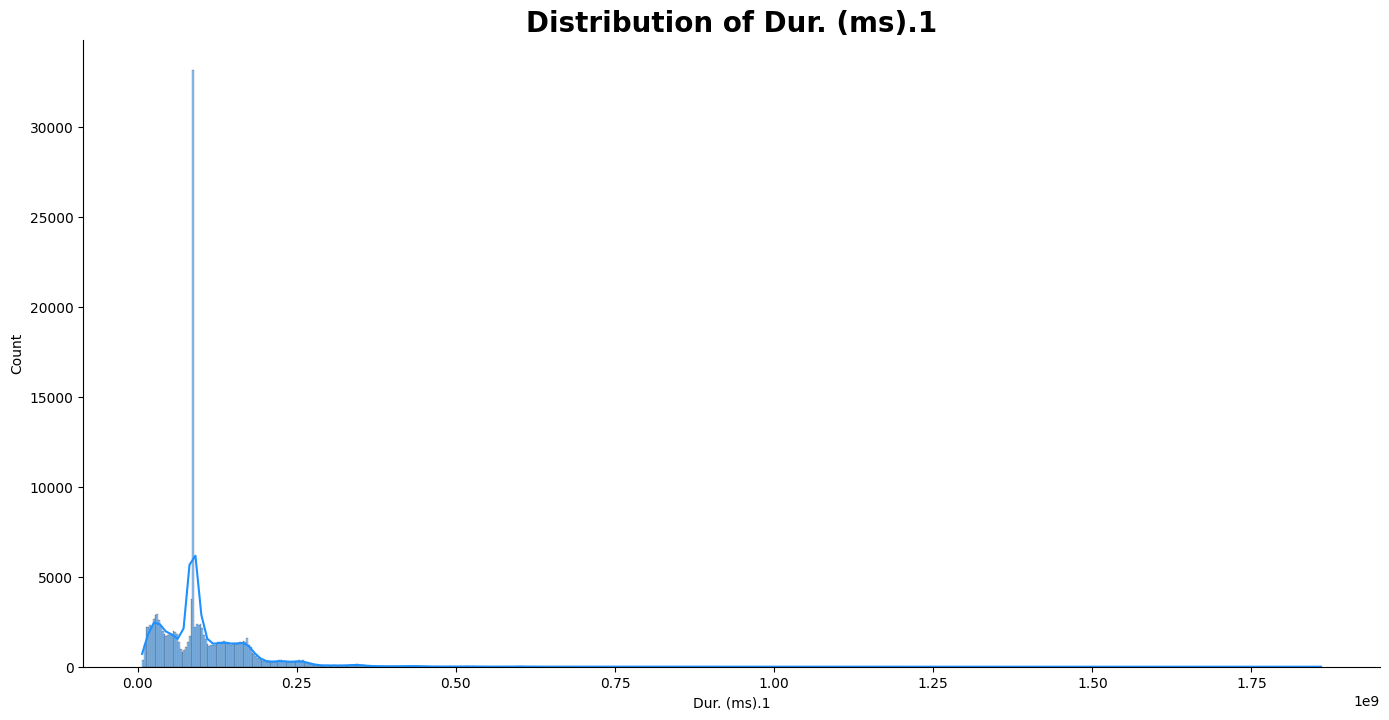

In [ ]:
plot_hist(telecom_df, 'Dur. (ms).1', 'dodgerblue')

Total Upload

In [ ]:
telecom_df[['Total UL (Bytes)']].describe()

,Total UL (Bytes)
count,1.485060e+05
mean,4.111937e+07
std,1.127844e+07
min,2.866892e+06
25%,3.321828e+07
50%,4.114196e+07
75%,4.903252e+07
max,7.833131e+07


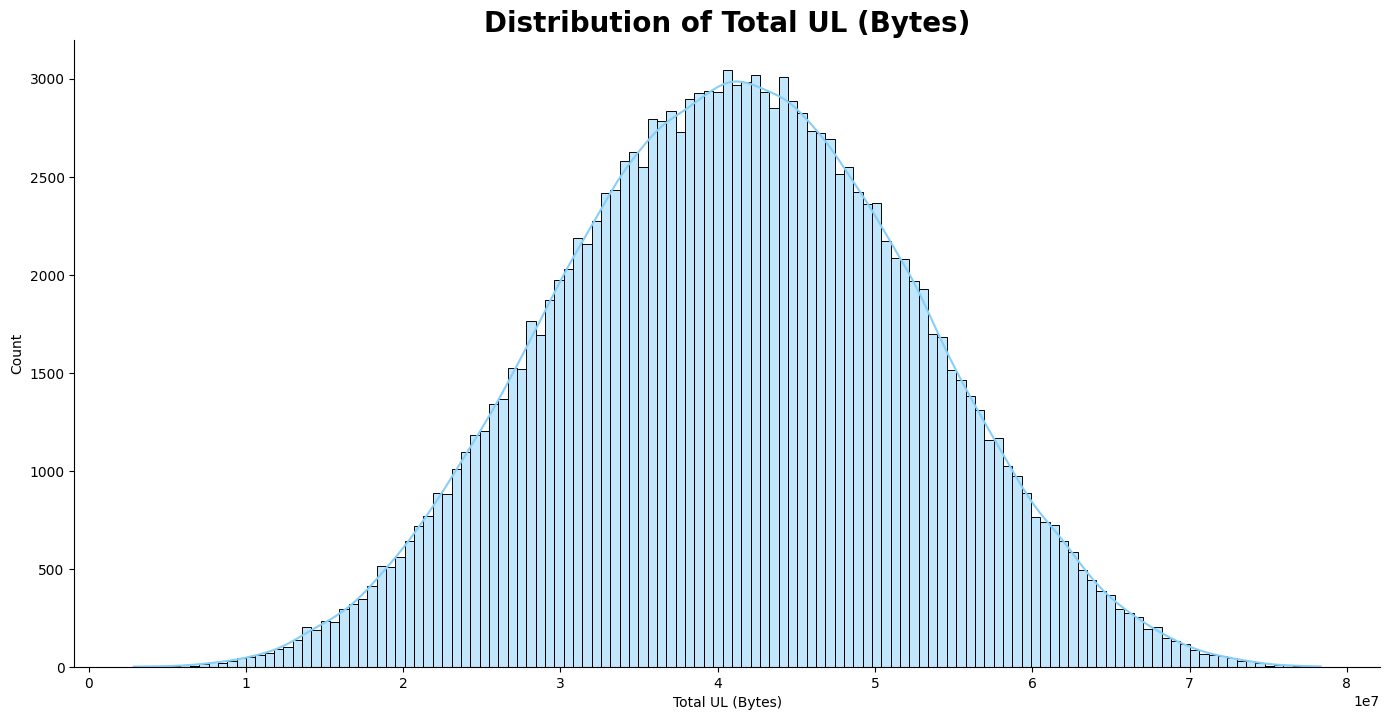

In [ ]:
plot_hist(telecom_df, 'Total UL (Bytes)', '#87CEFA')


Total Downloads Bytes

In [ ]:
telecom_df[['Total DL (Bytes)']].describe()

,Total DL (Bytes)
count,1.485060e+05
mean,4.546640e+08
std,2.441791e+08
min,7.114041e+06
25%,2.431263e+08
50%,4.559408e+08
75%,6.657542e+08
max,9.029696e+08


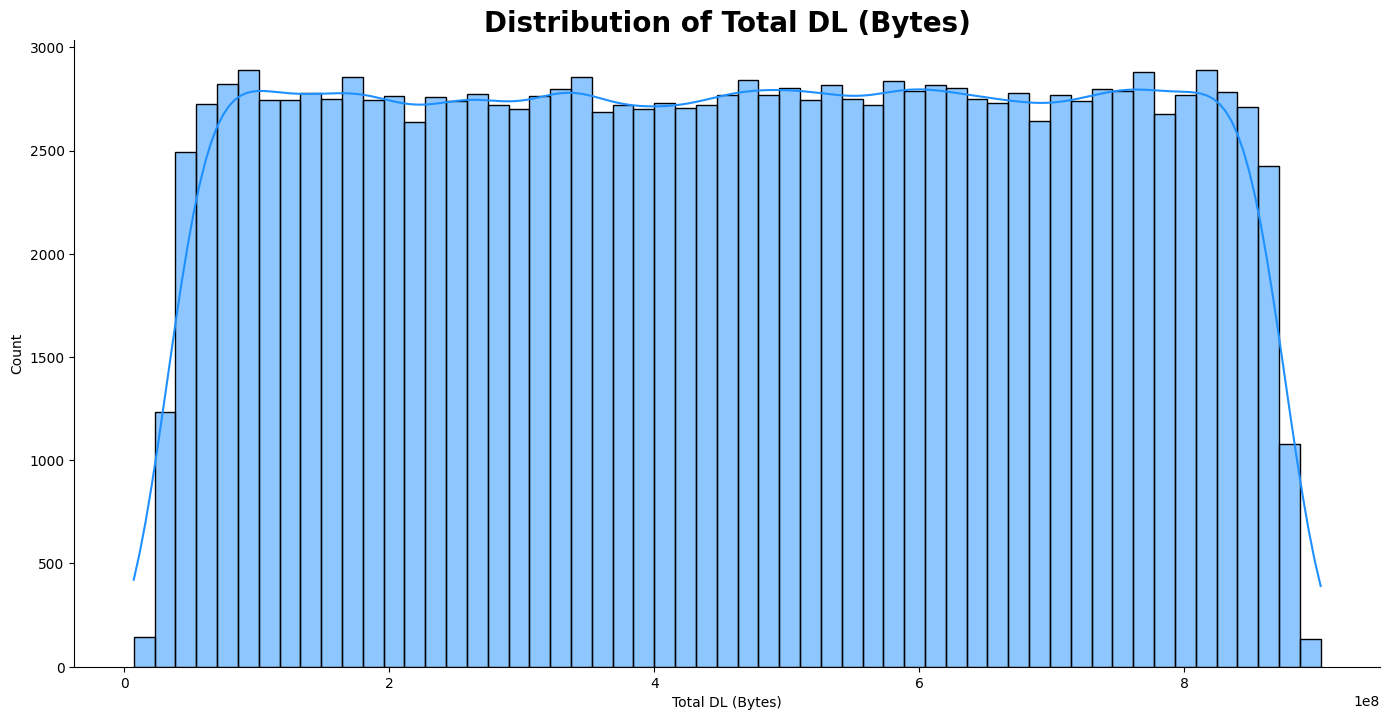

In [ ]:
plot_hist(telecom_df, 'Total DL (Bytes)', '#1E90FF')


Social Media Total Upload and Download Data

In [ ]:
telecom_df["Social_Media_Total_Data"].describe()

count    1.485060e+05
mean     1.828066e+06
std      1.035638e+06
min      1.563000e+03
25%      9.321828e+05
50%      1.825931e+06
75%      2.727493e+06
max      3.650861e+06
Name: Social_Media_Total_Data, dtype: float64

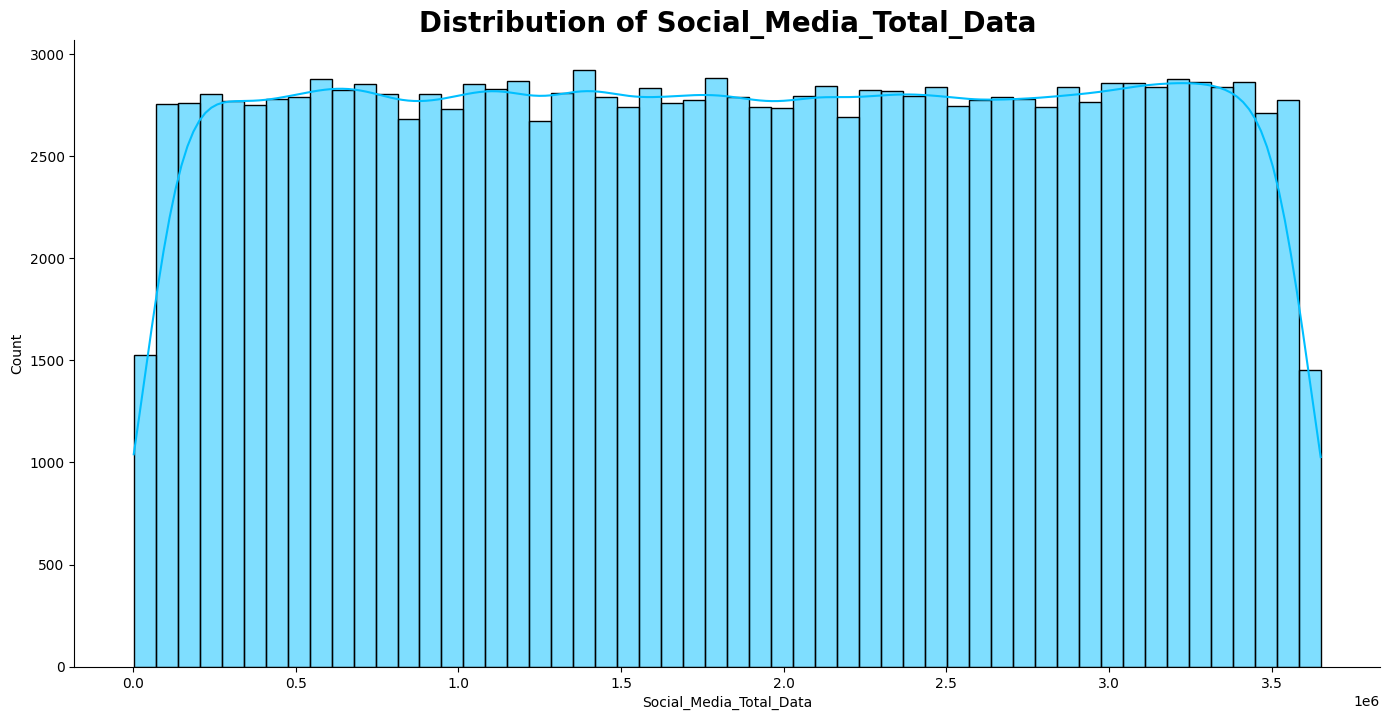

In [ ]:
plot_hist(telecom_df, 'Social_Media_Total_Data', '#00BFFF')



Google Total Data

In [ ]:
telecom_df[['Google_Total_Data']].describe()

,Google_Total_Data
count,1.485060e+05
mean,7.808063e+06
std,3.516724e+06
min,4.033000e+04
25%,4.944994e+06
50%,7.815669e+06
75%,1.068307e+07
max,1.552878e+07


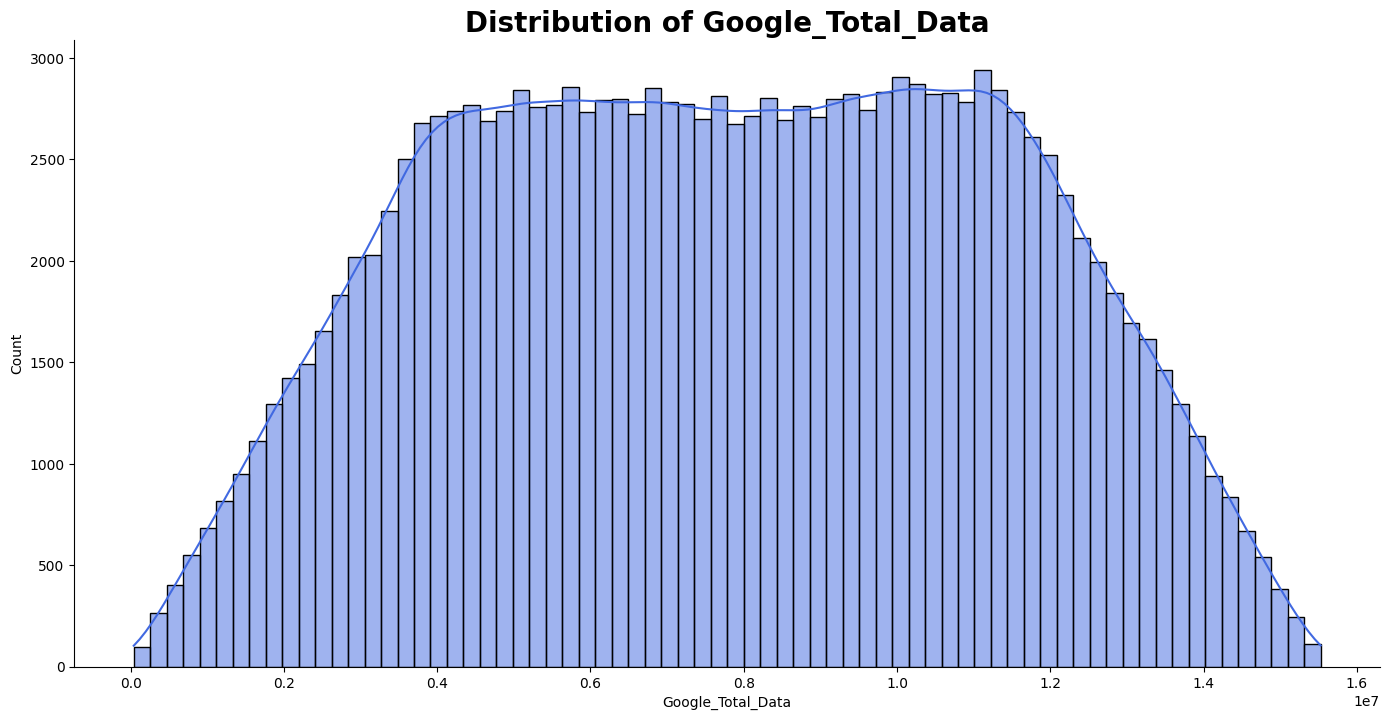

In [ ]:
plot_hist(telecom_df, 'Google_Total_Data', '#4169E1')


Total Email Data

In [ ]:
telecom_df[['Email_Total_Data']].describe()


,Email_Total_Data
count,1.485060e+05
mean,2.259188e+06
std,1.071152e+06
min,8.359000e+03
25%,1.359336e+06
50%,2.264186e+06
75%,3.160024e+06
max,4.518036e+06


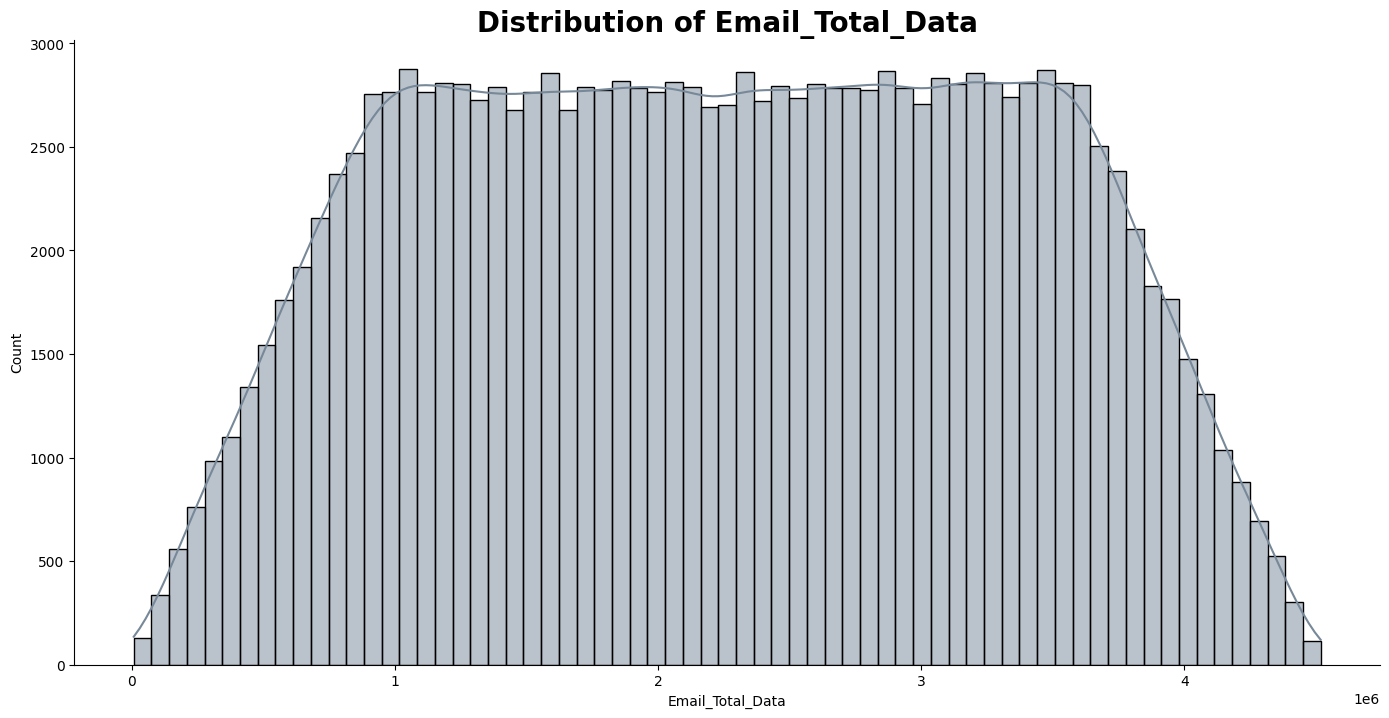

In [ ]:
plot_hist(telecom_df, 'Email_Total_Data', '#778899')

Total Youtube Data


In [ ]:
telecom_df[['Youtube_Total_Data']].describe()


,Youtube_Total_Data
count,1.485060e+05
mean,2.264244e+07
std,9.247684e+06
min,7.890300e+04
25%,1.599374e+07
50%,2.266131e+07
75%,2.929824e+07
max,4.519008e+07


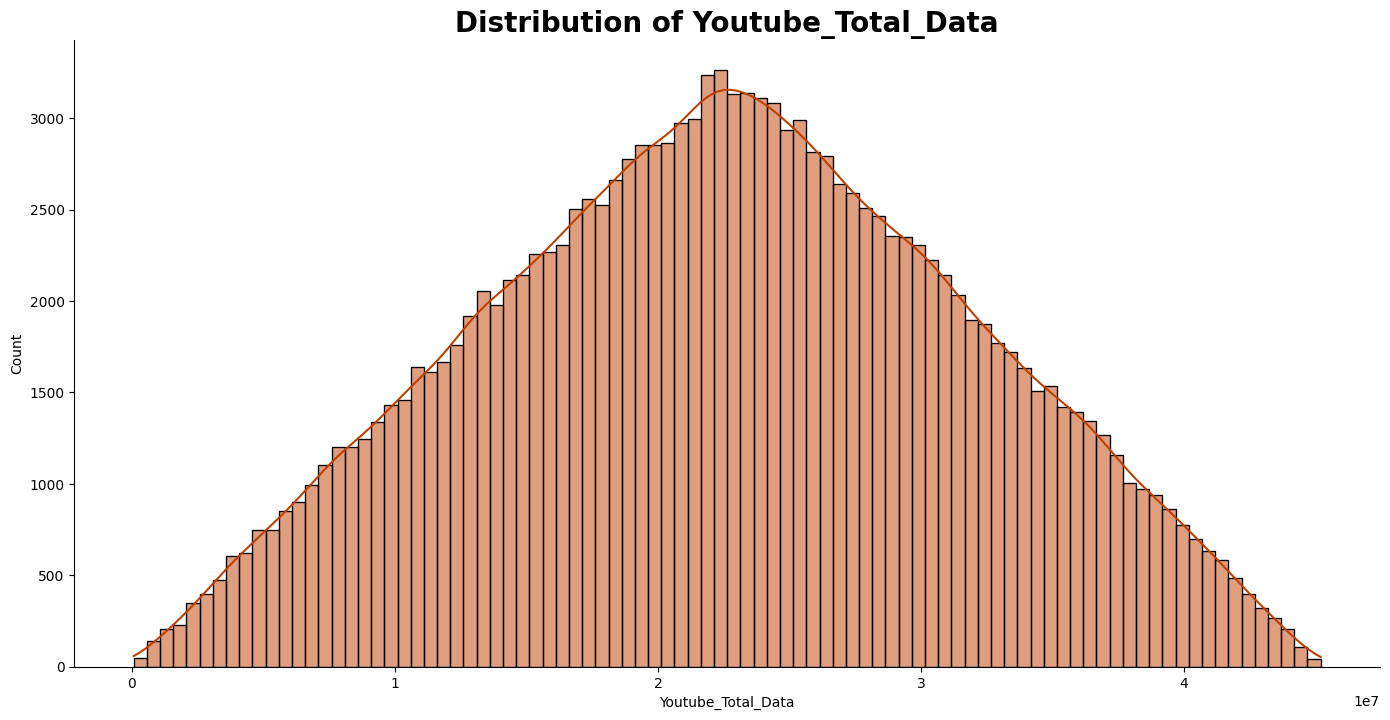

In [ ]:
plot_hist(telecom_df, 'Youtube_Total_Data', '#C04000')




Total Netflix Data

In [ ]:
telecom_df[['Netflix_Total_Data']].describe()


,Netflix_Total_Data
count,1.485060e+05
mean,2.262914e+07
std,9.260477e+06
min,9.843200e+04
25%,1.598016e+07
50%,2.263632e+07
75%,2.928832e+07
max,4.519815e+07


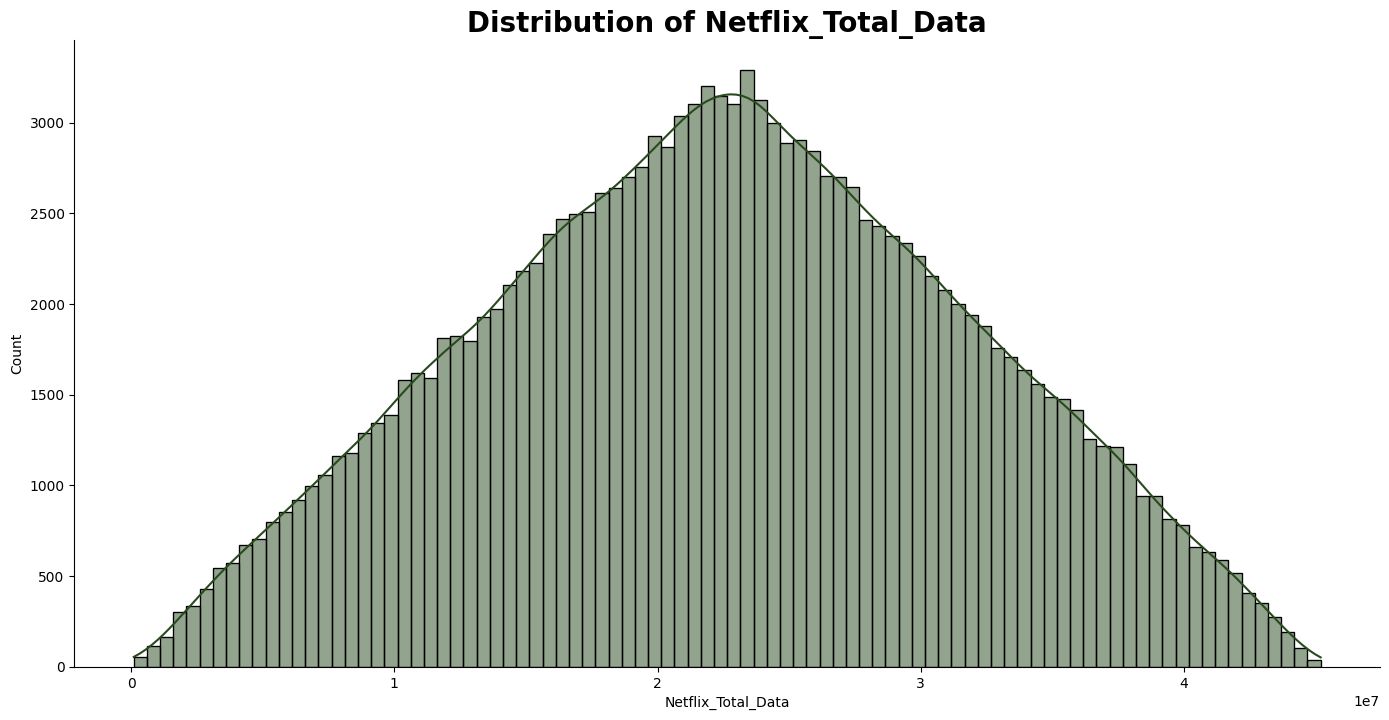

In [ ]:
plot_hist(telecom_df, 'Netflix_Total_Data', color="#294a1f")


Total Gaming Data

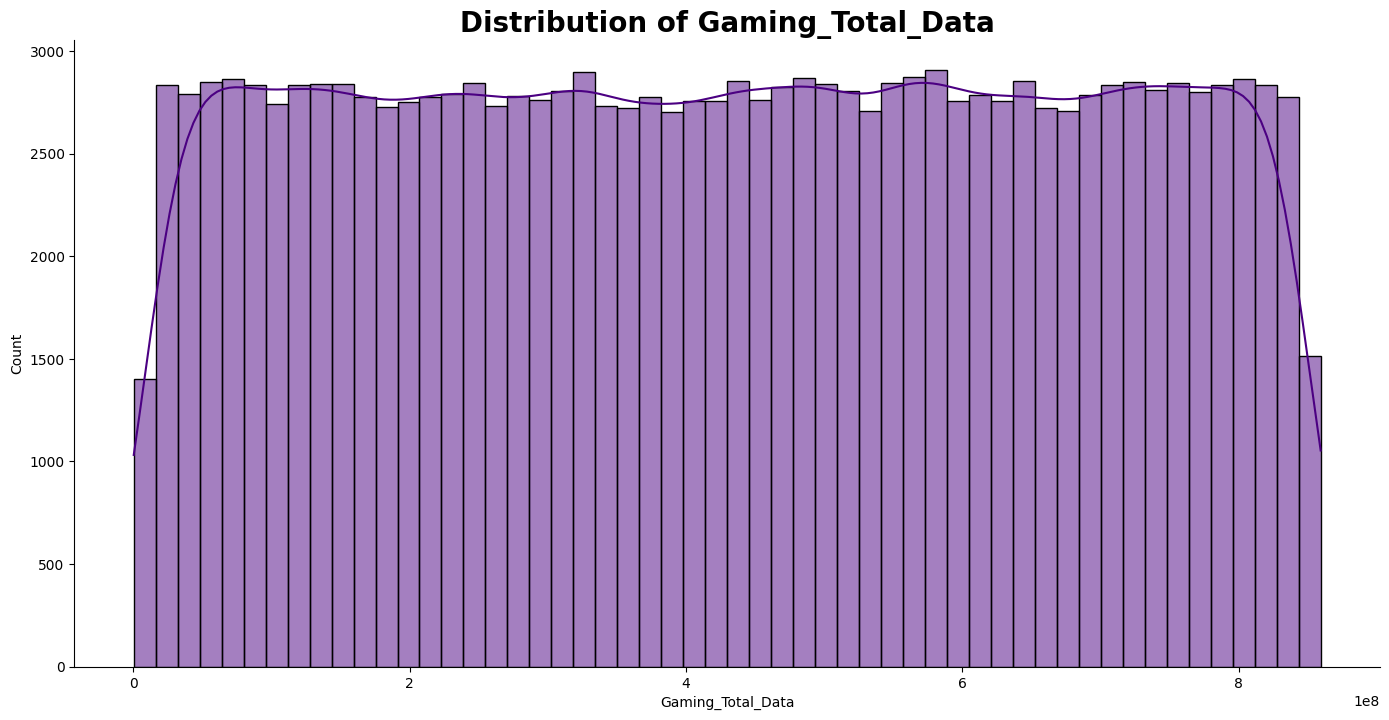

In [ ]:
plot_hist(telecom_df, 'Gaming_Total_Data', 'indigo')




Other Total Data


In [ ]:
telecom_df[['Other_Total_Data']].describe()

,Other_Total_Data
count,1.485060e+05
mean,4.294152e+08
std,2.432284e+08
min,1.490450e+05
25%,2.186682e+08
50%,4.300438e+08
75%,6.398960e+08
max,8.595209e+08


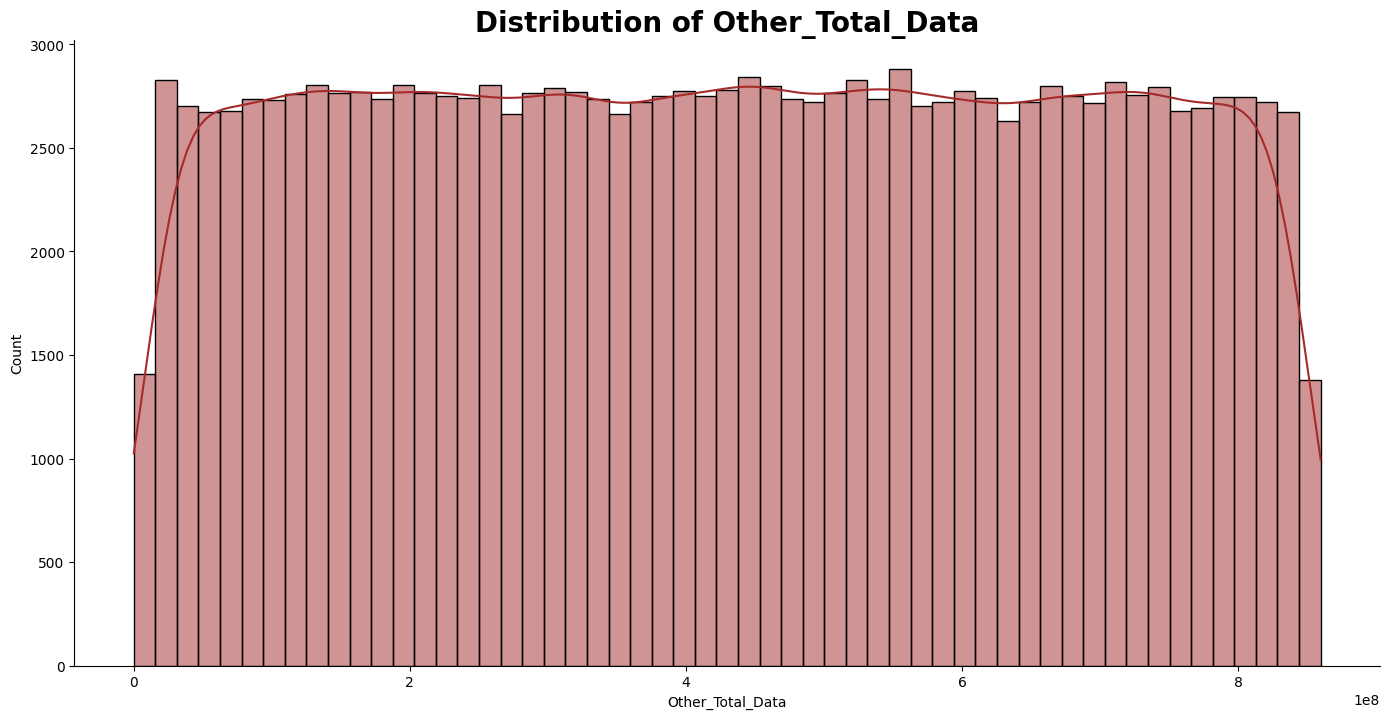

In [ ]:
plot_hist(telecom_df, 'Other_Total_Data', '#A52A2A')

Bivariate Analysis 

explore the relationship between each application & the total DL+UL data

In [ ]:
sample_data = telecom_df.sample(frac=0.000099)
print(sample_data.shape)
sum_column = sample_data["Total DL (Bytes)"] + sample_data["Total UL (Bytes)"]

(15, 52)


In [ ]:
telecom_df["Youtube_Total_Data"]=telecom_df["Youtube DL (Bytes)"]+telecom_df["Youtube UL (Bytes)"]
telecom_df["Google_Total_Data"]=telecom_df["Google DL (Bytes)"]+telecom_df["Google UL (Bytes)"]
telecom_df["Email_Total_Data"]=telecom_df["Email DL (Bytes)"]+telecom_df["Email UL (Bytes)"]
telecom_df["Social_Media_Total_Data"]=telecom_df["Social Media DL (Bytes)"]+telecom_df["Social Media UL (Bytes)"]
telecom_df["Netflix_Total_Data"]=telecom_df["Netflix DL (Bytes)"]+telecom_df["Netflix UL (Bytes)"]
telecom_df["Gaming_Total_Data"]=telecom_df["Gaming DL (Bytes)"]+telecom_df["Gaming UL (Bytes)"]
telecom_df["Other_Total_Data"]=telecom_df["Other DL (Bytes)"]+telecom_df["Other UL (Bytes)"]
telecom_df["Total UL and DL"]=telecom_df["Total UL (Bytes)"]+telecom_df["Total DL (Bytes)"]


In [ ]:
columns = ['MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']

user_ratio_usage= telecom_df[columns].groupby('MSISDN/Number').sum()
user_ratio_usage.head(10)

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
MSISDN/Number,,,,,,,,
"33,601,001,722","21,624,548","4,389,005","1,331,362","2,232,135","27,180,981","812,458,661","386,570,872","878,690,574"
"33,601,001,754","12,432,223","5,334,863","3,307,781","2,660,565","11,221,763","119,750,078","281,710,071","156,859,643"
"33,601,002,511","21,333,570","3,443,126","3,205,380","3,195,623","19,353,900","538,827,713","501,693,672","595,966,483"
"33,601,007,832","6,977,321","9,678,493","2,284,670","280,294","1,942,092","391,126,127","35,279,702","422,320,698"
"33,601,008,617","41,533,002","18,499,616","3,305,469","2,912,542","49,201,724","1,314,797,820","804,804,484","1,457,410,944"
"33,601,010,682","34,347,122","15,263,134","7,848,596","3,792,912","30,315,501","511,635,787","492,372,777","615,217,221"
"33,601,011,634","26,431,335","10,196,403","1,358,959","2,769,627","45,812,397","548,461,057","224,888,713","654,723,066"
"33,601,011,959","18,892,740","12,023,614","2,215,563","1,782,692","15,292,840","282,364,397","178,201,537","332,660,357"
"33,601,014,694","63,443,802","14,134,211","4,599,825","5,288,685","54,216,117","833,087,952","1,041,882,992","990,132,189"


In [ ]:
apps_columns = ['Dur. (ms)','MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']


In [ ]:
user_ratio_usage = telecom_df[apps_columns]

user_ratio_usage.columns

Index(['Dur. (ms)', 'MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data',
       'Email_Total_Data', 'Social_Media_Total_Data', 'Netflix_Total_Data',
       'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL'],
      dtype='object')

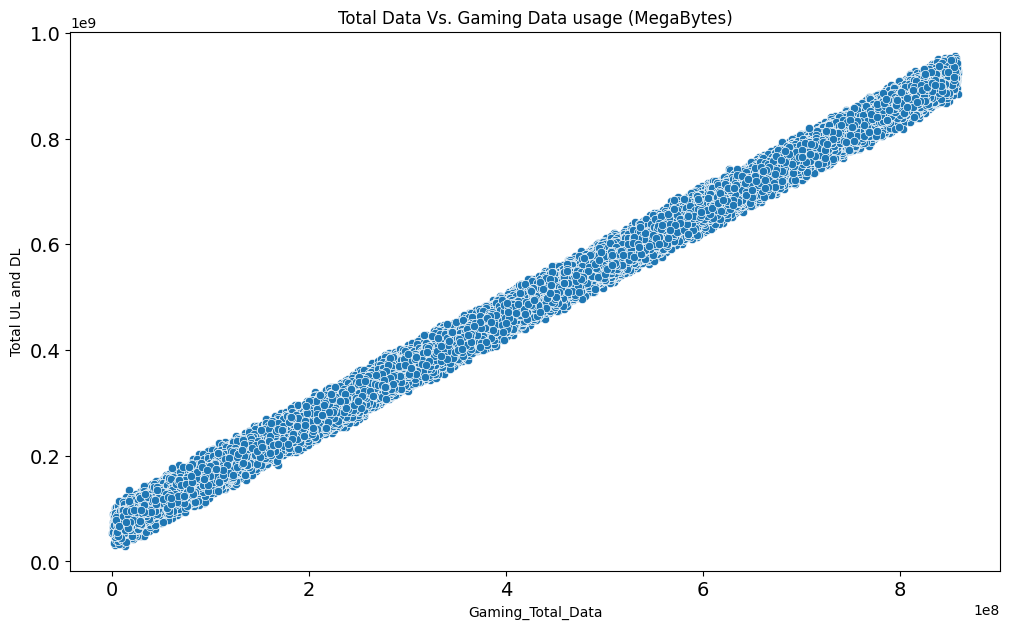

In [ ]:
plot_scatter(user_ratio_usage,'Gaming_Total_Data', 'Total UL and DL', 'Total Data Vs. Gaming Data usage (MegaBytes)')


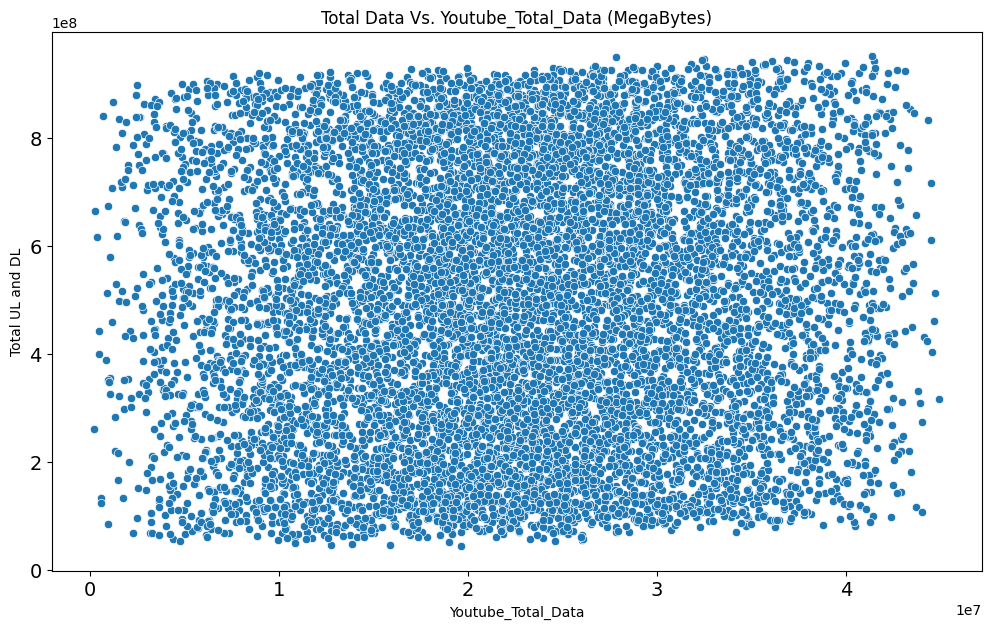

In [ ]:
plot_scatter(user_ratio_usage.sample(10000), 'Youtube_Total_Data', 'Total UL and DL', 'Total Data Vs. Youtube_Total_Data (MegaBytes)')



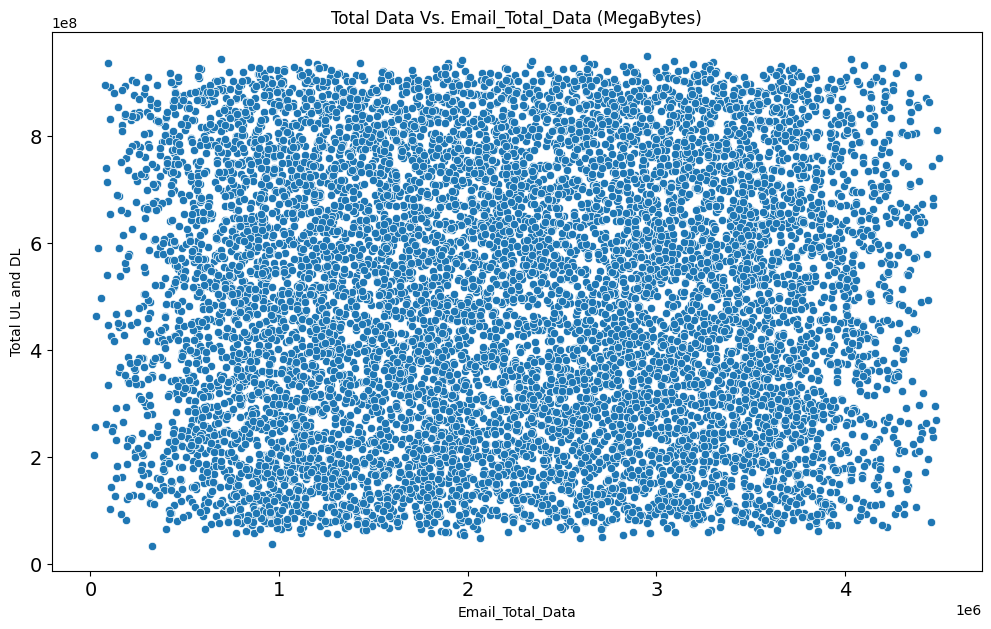

In [ ]:
plot_scatter(user_ratio_usage.sample(10000), 'Email_Total_Data', 'Total UL and DL', 'Total Data Vs. Email_Total_Data (MegaBytes)')



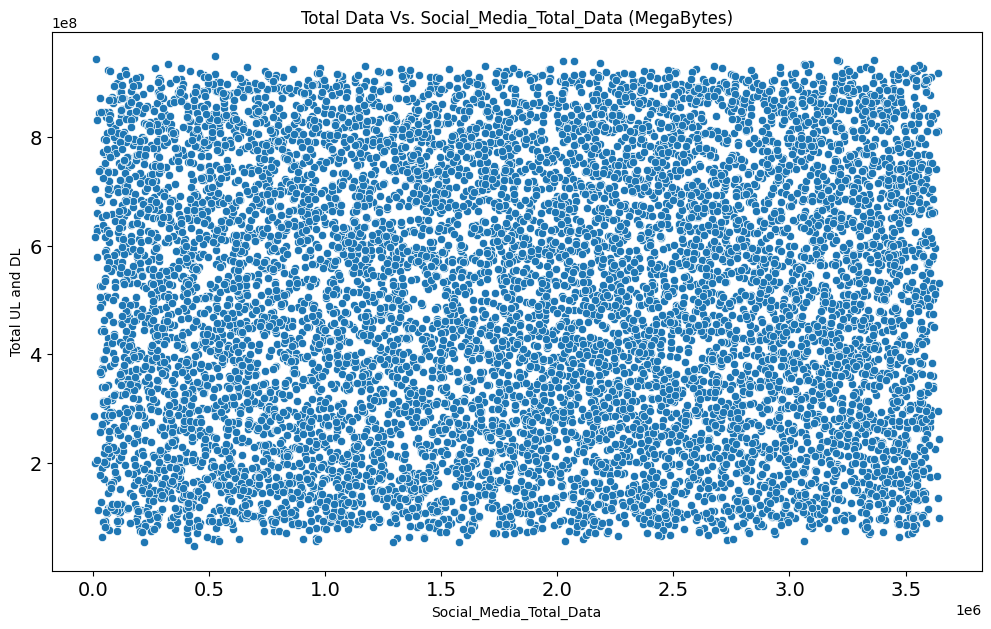

In [ ]:
plot_scatter(user_ratio_usage.sample(10000), 'Social_Media_Total_Data', 'Total UL and DL', 'Total Data Vs. Social_Media_Total_Data (MegaBytes)')



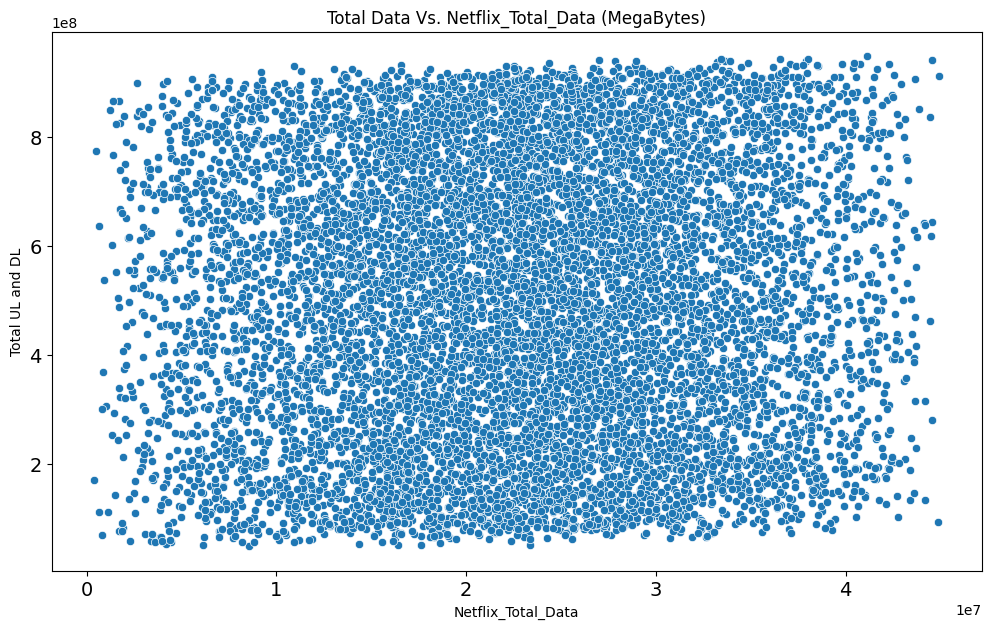

In [ ]:
plot_scatter(user_ratio_usage.sample(10000), 'Netflix_Total_Data', 'Total UL and DL', 'Total Data Vs. Netflix_Total_Data (MegaBytes)')


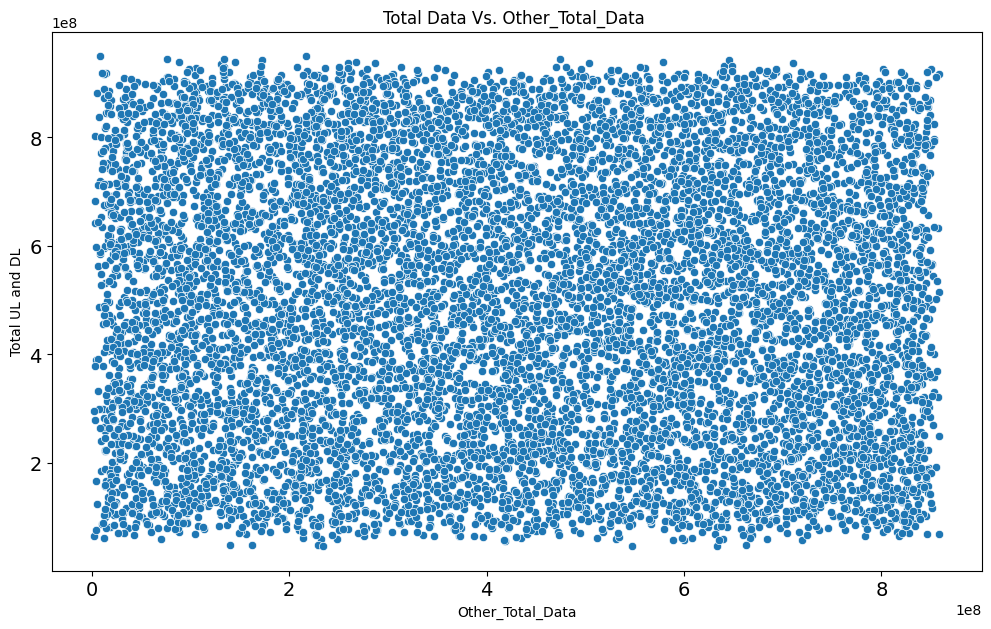

In [ ]:
plot_scatter(user_ratio_usage.sample(10000), 'Other_Total_Data', 'Total UL and DL', 'Total Data Vs. Other_Total_Data ')



Variable transformations

segmenting the users into top 5 decile classes

/tmp/ipykernel_16323/2030566624.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax=telecom_df.groupby('decile')['total_data'].sum().head(5).plot(kind='bar', xticks=[0,1,2,3,4])


Text(0, 0.5, 'Data Durations')

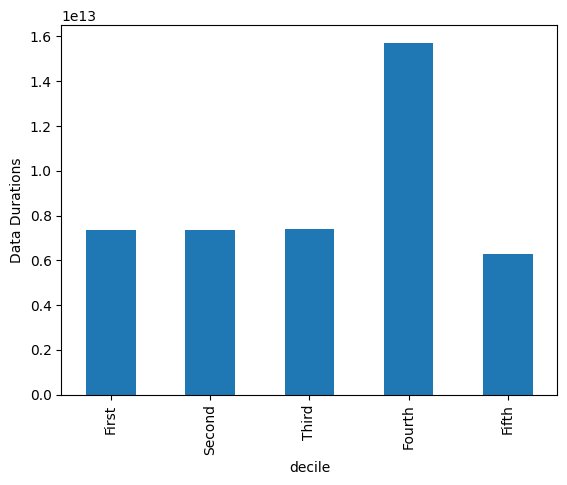

In [ ]:
# compute the total dl and ul
telecom_df['total_data'] = telecom_df["Total DL (Bytes)"] + telecom_df["Total UL (Bytes)"]

# compute the decile classes
telecom_df['decile'] = pd.qcut(telecom_df['Dur. (ms)'],10, duplicates='drop')

ax=telecom_df.groupby('decile')['total_data'].sum().head(5).plot(kind='bar', xticks=[0,1,2,3,4])
ax.set_xticklabels(['First','Second','Third','Fourth','Fifth'])
ax.set_ylabel('Data Durations')


Correlation Analysis

In [ ]:
columns = ['Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']
corr = user_ratio_usage[columns].corr()
corr


,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
Youtube_Total_Data,1,0,-0,0,0,-0,0,0
Google_Total_Data,0,1,-0,-0,-0,-0,-0,0
Email_Total_Data,-0,-0,1,0,0,-0,-0,0
Social_Media_Total_Data,0,-0,0,1,0,0,0,0
Netflix_Total_Data,0,-0,0,0,1,-0,-0,0
Gaming_Total_Data,-0,-0,-0,0,-0,1,-0,1
Other_Total_Data,0,-0,-0,0,-0,-0,1,-0
Total UL and DL,0,0,0,0,0,1,-0,1


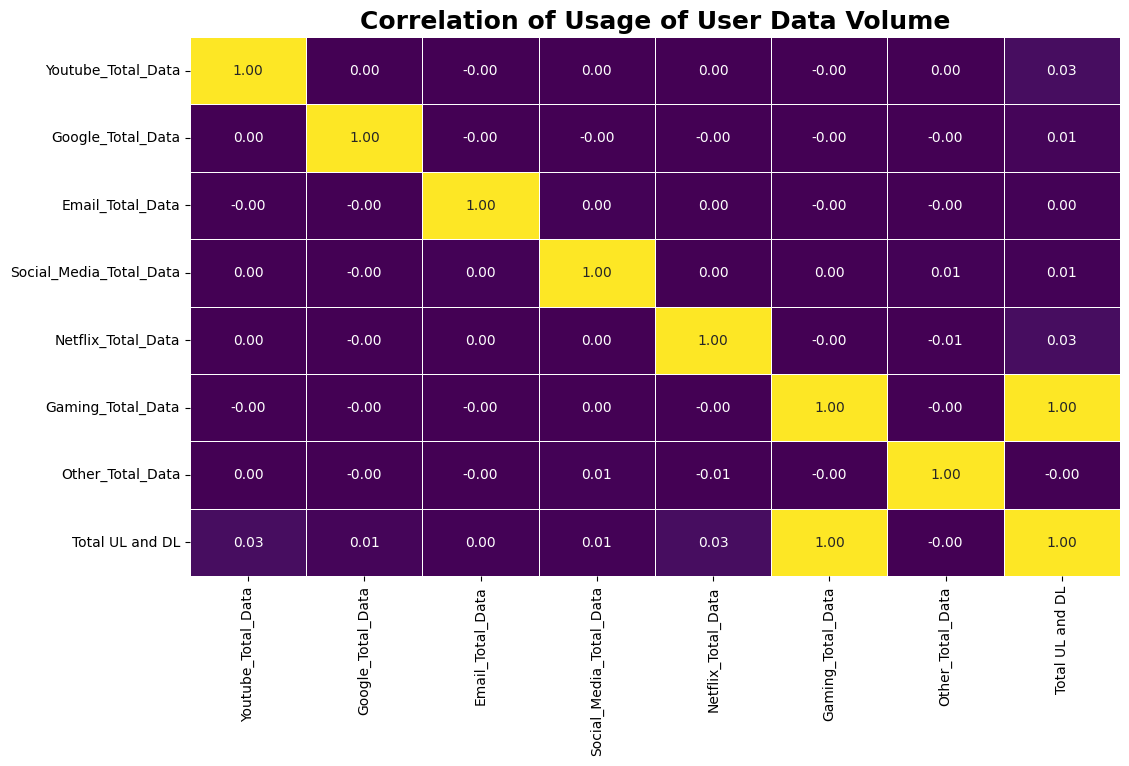

In [ ]:
plot_heatmap(corr, "Correlation of Usage of User Data Volume")



Dimensionality Reduction

In [ ]:
numeric_df = user_ratio_usage.select_dtypes(include='float64') 

In [ ]:
numeric_df.describe()

,Dur. (ms),MSISDN/Number,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
count,"148,506","148,506","148,506","148,506","148,506","148,506","148,506","148,506","148,506","148,506"
mean,"105,084","41,906,541,782","22,642,436","7,808,063","2,259,188","1,828,066","22,629,144","430,353,822","429,415,150","495,783,405"
std,"81,073","2,450,975,846,357","9,247,684","3,516,724","1,071,152","1,035,638","9,260,477","244,056,892","243,228,409","244,414,631"
min,"7,142","33,601,001,722","78,903","40,330","8,359","1,563","98,432","306,358","149,045","28,956,107"
25%,"58,249","33,651,311,444","15,993,736","4,944,994","1,359,336","932,183","15,980,158","218,736,240","218,668,175","284,528,559"
50%,"86,399","33,663,708,556","22,661,314","7,815,669","2,264,186","1,825,931","22,636,325","431,658,476","430,043,830","496,922,522"
75%,"132,933","33,683,515,177","29,298,240","10,683,066","3,160,024","2,727,493","29,288,322","641,528,162","639,895,974","706,567,698"
max,"1,859,336","882,397,108,489,451","45,190,078","15,528,782","4,518,036","3,650,861","45,198,153","859,202,784","859,520,934","955,984,776"


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(numeric_df)


StandardScaler()

In [ ]:
scaled_data = scaler.transform(numeric_df)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(scaled_data)


PCA(n_components=10)

In [ ]:
x_pca = pca.transform(scaled_data)


Text(0, 0.5, 'Second Principal Component')

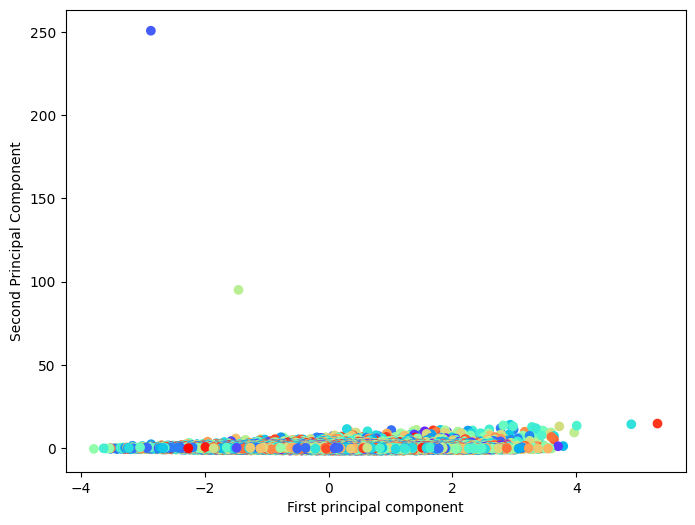

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,4],x_pca[:,1],c=user_ratio_usage['Total UL and DL'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


Text(0, 0.5, 'Cumulative explained variance')

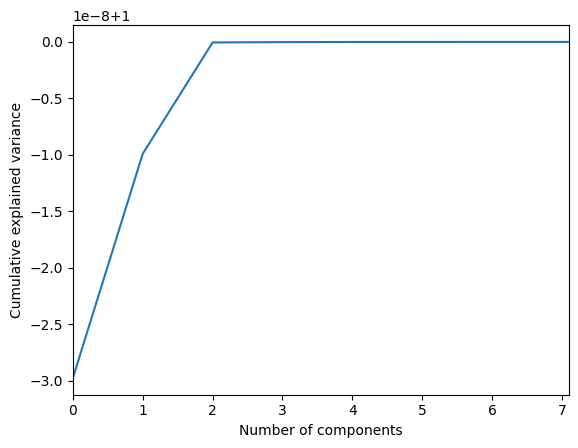

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(numeric_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7.1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')



In [ ]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(numeric_df)
Y_sklearn

array([[-8.24157941e+09,  2.02724828e+08, -2.49667936e+08,
         1.06903442e+07,  4.02451815e+05, -4.11174751e+06],
       [-8.22468751e+09, -2.76030736e+08,  1.13646232e+08,
        -3.03315080e+07,  2.66899041e+06, -4.05441500e+06],
       [-8.14591452e+09,  2.74618631e+08, -1.56004043e+07,
        -1.28958714e+07,  7.56271423e+06,  9.60396195e+05],
       ...,
       [-8.24309199e+09, -2.89683426e+08,  2.86374237e+08,
        -1.24669611e+07, -1.31599092e+07, -6.20593035e+06],
       [-8.28465173e+09, -1.91028452e+08, -2.96239219e+08,
         5.38446258e+06,  6.78466906e+06, -3.22809682e+05],
       [-8.28691972e+09,  1.21448553e+08,  3.86221651e+08,
         1.53795441e+07,  2.90712682e+05, -1.31627843e+06]])